### BANK MARKETING : Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.


In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [105]:
#Customer Function
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

In [106]:
df = pd.read_csv('termdeposit_train.csv')
df_test = pd.read_csv('termdeposit_test.csv')


In [107]:
# Display the load data
print(f"\n{'*'*30} Train dataset {'*'*30}")
display(df.head())

print(f"\n\n{'*'*30} Test dataset {'*'*30}")
display(df_test.head())


****************************** Train dataset ******************************


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no




****************************** Test dataset ******************************


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


# 1. EDA Exploratory Data Analysis

In [110]:
# checking the dimension of the datasets
df.shape

print(f"The rows and columns in the training dataset: {df.shape}")
print(f"\nThe column headers in the training dataset: {df.columns}")

print(f"\n\nThe rows and columns in the test dataset: {df_test.shape}")
print(f"\nThe column headers in the test dataset: {df_test.columns}")

The rows and columns in the training dataset: (31647, 18)

The column headers in the training dataset: Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


The rows and columns in the test dataset: (13564, 17)

The column headers in the test dataset: Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [111]:
# checking the types of columns
print(f"\n{'*'*30} Train dataset {'*'*30}")
print(df.info())

# checking the types in the test dataset
print(f"\n{'*'*30} Test dataset {'*'*30}")
print(df_test.info())


****************************** Train dataset ******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(

There are two types of data (int64 and object ) present in both datasets.

ID, age, balance, day, duration, campaign, pdays, previous: int64
job, marital, education, default, housing, loan, contact, month, poutcome, and subscribe(only in the training dataset): object
None of the dataset contain null values.

In [112]:
# checking the null values in the training dataset
missing_val = df.isnull().sum().to_frame("Missing in df")
missing_val['Missing in df_test'] = df_test.isnull().sum()

missing_val

,Missing in df,Missing in df_test
ID,0,0.0
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0


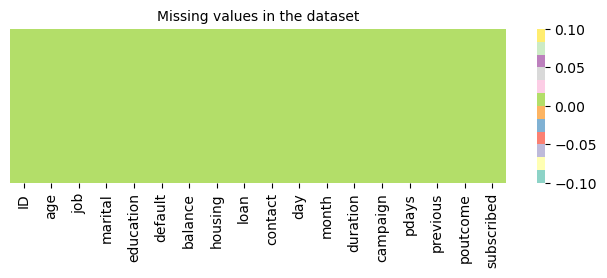

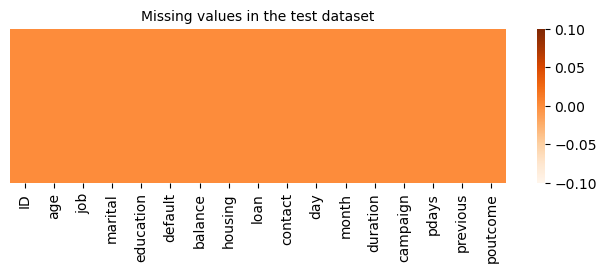

In [113]:
# Let's visualize it using heatmap for dataset
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);

# Lets visualize it using heatmap for test dataset
plt.figure(figsize=(8,2))
sns.heatmap(df_test.isnull(), yticklabels=False, cmap='Oranges')
plt.title('Missing values in the test dataset', fontsize=10);

In [27]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of Unique values')
info_df['type'] = df.dtypes.values

# Using concat instead of append
info_df['No. of Test Unique values'] = pd.concat([df_test.nunique(), pd.Series([None], index=[''])], ignore_index=False)
info_df['type_test'] = pd.concat([df_test.dtypes, pd.Series([None], index=[''])], ignore_index=False)

info_df['Difference'] = info_df['No. of Unique values'] - info_df['No. of Test Unique values']
info_df

,No. of Unique values,type,No. of Test Unique values,type_test,Difference
ID,31647,int64,13564,int64,18083
age,76,int64,75,int64,1
job,12,object,12,object,0
marital,3,object,3,object,0
education,4,object,4,object,0
default,2,object,2,object,0
balance,6326,int64,4292,int64,2034
housing,2,object,2,object,0
loan,2,object,2,object,0
contact,3,object,3,object,0


About the number of unique values in the datasets:

ID number column has the same unique values as the dataset rows, this column only serves to identify each record but doesn't influence the target variable. There for we can drop it.

The dataset contains the following categorical variables: job(12), marital(3), education(4), default(2), housing(2), loan(2), contact(3), month(12), poutcome(4), and subscribe(2) with its respective unique values.

The numerical columns in the dataset are age, balance, day, duration, campaign, pdays, and previous.

Next, we will remove the column ID for the reasons explained previously. All processing will be applied to both the training and test datasets.

In [114]:
# Dropping the column ID
print(f"\n{'*'*30} Train dataset {'*'*30}")
df.drop(['ID'], axis=1, inplace=True)
display(df.sample(5))

print(f"\n{'*'*30} Test dataset {'*'*30}")
df_test.drop(['ID'], axis=1, inplace=True)
display(df_test.sample(5))


****************************** Train dataset ******************************


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
27524,35,blue-collar,single,secondary,no,8040,yes,no,cellular,13,may,173,2,-1,0,unknown,no
14339,58,management,divorced,tertiary,no,5037,yes,no,cellular,18,nov,1437,2,-1,0,unknown,yes
11385,30,technician,single,tertiary,no,2784,no,no,cellular,20,nov,808,3,-1,0,unknown,no
8734,44,technician,married,secondary,no,1127,yes,no,cellular,19,aug,82,8,-1,0,unknown,no
21500,58,blue-collar,married,secondary,no,25,no,no,unknown,9,jun,486,3,-1,0,unknown,yes



****************************** Test dataset ******************************


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4487,30,blue-collar,married,secondary,no,177,yes,no,cellular,9,apr,62,2,332,3,failure
8520,33,technician,married,secondary,no,218,yes,yes,telephone,2,mar,169,4,-1,0,unknown
12958,32,management,single,tertiary,no,1831,yes,no,cellular,20,apr,86,2,-1,0,unknown
4648,58,management,married,tertiary,no,913,no,yes,cellular,8,jul,326,6,-1,0,unknown
7257,48,management,divorced,tertiary,no,-478,yes,no,cellular,17,nov,87,5,167,6,failure


In [115]:
# checking the new dimension of the dataset
print(f"The rows and columns in the dataset: {df.shape}")

# checking the new dimension of the test dataset
print(f"The rows and columns in the test dataset: {df_test.shape}")

The rows and columns in the dataset: (31647, 17)
The rows and columns in the test dataset: (13564, 16)


Subscribed unique values

In [116]:
# Checking the target variable
df['subscribed'].value_counts().to_frame()

,count
subscribed,
no,27932
yes,3715


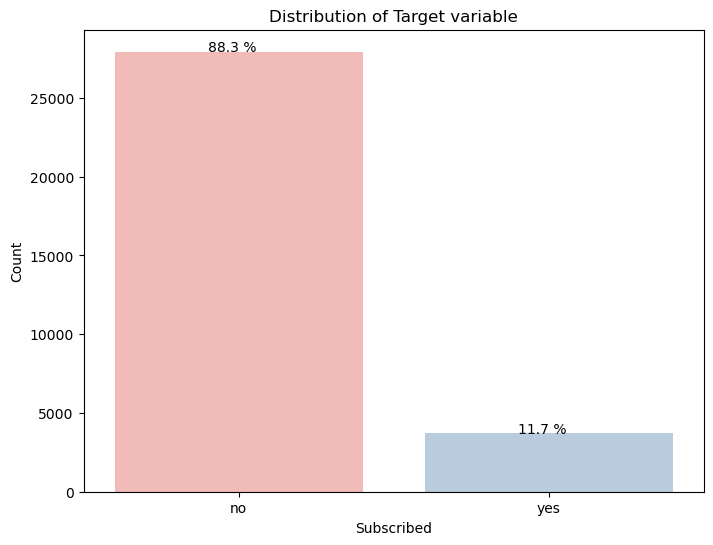

In [118]:
# Visualize the distribution of subscribed
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='subscribed')
show_percentage(ax, len(df))
plt.title('Distribution of Target variable')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

In [119]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: {categorical_col}")
print(f"Numerical Columns: {numerical_col}")

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
Numerical Columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [120]:
# Checking the value counts of the categorical independent variables
for col in categorical_col[:-1]:
    display(df[col].value_counts())

job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64

default
no     31062
yes      585
Name: count, dtype: int64

housing
yes    17584
no     14063
Name: count, dtype: int64

loan
no     26516
yes     5131
Name: count, dtype: int64

contact
cellular     20423
unknown       9177
telephone     2047
Name: count, dtype: int64

month
may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: count, dtype: int64

poutcome
unknown    25929
failure     3362
other       1288
success     1068
Name: count, dtype: int64

In [121]:
# Checking the value counts of the categorical independent variables
for col in numerical_col:
    display(df[col].value_counts())

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64

balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64

day
20    1909
18    1612
21    1445
5     1373
6     1348
17    1344
14    1283
8     1281
28    1276
29    1241
7     1240
19    1228
15    1208
12    1116
13    1099
9     1097
30    1082
4     1016
11    1014
16     981
2      900
27     804
3      761
26     761
23     657
22     640
25     586
31     460
10     360
24     305
1      220
Name: count, dtype: int64

duration
90      135
124     130
139     127
88      127
104     127
       ... 
1405      1
1090      1
1261      1
1218      1
1973      1
Name: count, Length: 1454, dtype: int64

campaign
1     12262
2      8798
3      3858
4      2442
5      1245
6       916
7       518
8       356
9       236
10      184
11      126
12      102
13       93
14       68
15       61
16       54
17       52
20       37
18       37
19       30
21       19
22       18
25       17
28       14
23       13
24       13
29       12
26        9
31        9
27        8
30        6
32        6
33        5
34        5
43        3
35        3
38        3
37        2
63        1
41        1
50        1
55        1
44        1
36        1
39        1
Name: count, dtype: int64

pdays
-1      25924
 182      118
 92       100
 91        87
 183       85
        ...  
 51         1
 20         1
 25         1
 526        1
 382        1
Name: count, Length: 509, dtype: int64

previous
0      25924
1       1921
2       1481
3        780
4        501
5        311
6        188
7        138
8         81
9         64
10        49
11        46
13        30
12        30
15        15
14        14
17        11
16         8
19         8
23         6
18         5
20         5
21         4
22         4
25         4
27         4
26         2
29         2
24         2
275        1
28         1
32         1
30         1
38         1
58         1
35         1
41         1
37         1
Name: count, dtype: int64

In [35]:
# Summary statistics of numerical columns
stats = df.describe()
stats

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [122]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

balance     913.890258
duration     78.113534
pdays        40.576042
age           1.957247
campaign      0.765697
previous      0.574272
day          -0.164534
dtype: float64

In [123]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

balance     94706.501155
duration     4145.648520
pdays         632.788773
previous      269.580670
campaign       54.006643
age            32.792484
day            -1.509660
dtype: float64

Observations:

The summary of the dataset has negative/invalid values present in columns {balance and pdays}.
The counts of all the columns are the same which means there are no missing values in the dataset.
The dependent variable {subscribe} is categorical with two unique values yes/no.
The mean value is larger than the median(50%) in columns { balance, duration, pdays, age, campaing, previous}, which means the data is skewed to the right in these columns.
The data in the column {day} have a small difference between the mean value less than the median which means the data is skewed to the left.
The dataset could present outliers in the columns {balance, duration, pdays, previous, campaign, age}, however in the univariate analysis of each feature we will verify it.
The features are not on the same scale. Features should be on the same scale for algorithms such as logistic regression to converge smoothly.

In [124]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,31647,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,6842,19095,16224,31062,17584,26516,20423,9669,25929,27932


In [125]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 17)

,count
subscribed,
no,27932
yes,3715


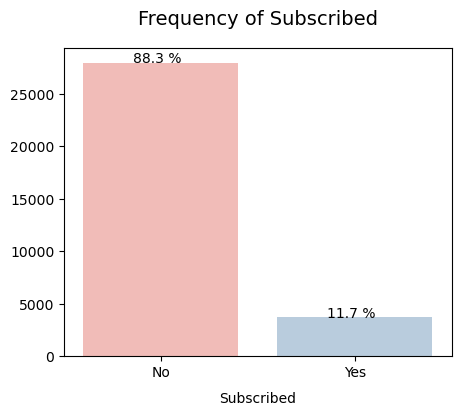

In [126]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of subscribed
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('Subscribed', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['No', 'Yes'], size=10)
plt.title(f"Frequency of Subscribed", size=14, y=1.05)

df['subscribed'].value_counts().to_frame()

In [127]:
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

,proportion
job,
blue-collar,0.216197
management,0.209783
technician,0.167694
admin.,0.114734
services,0.091731
retired,0.049736
self-employed,0.035485
entrepreneur,0.031851
unemployed,0.028597


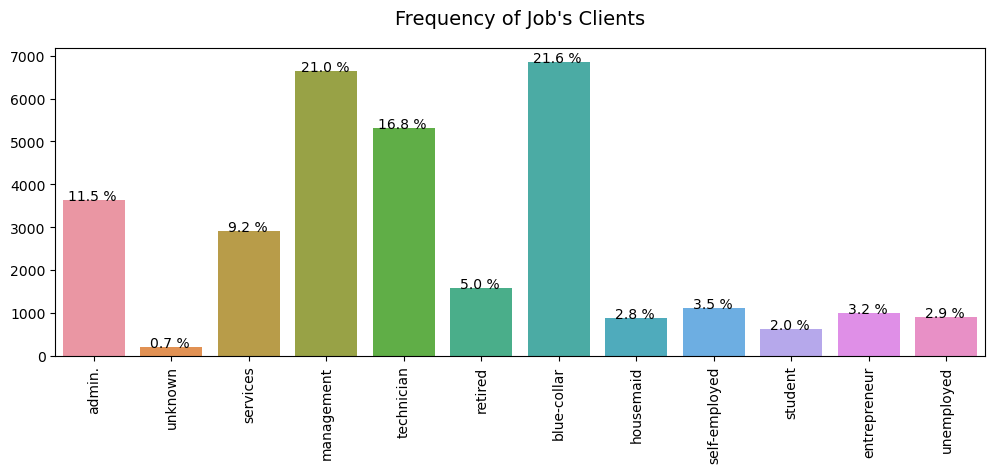

In [128]:
# Visualize the frequency of job
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='job', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks(rotation=90)
plt.title(f"Frequency of Job's Clients", size=14, y=1.05)

df['job'].value_counts(normalize=True).to_frame()

,count
marital,
married,19095
single,8922
divorced,3630


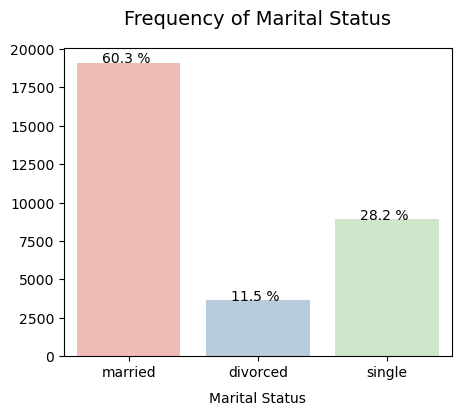

In [129]:
# Visualize the frequency of marital
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='marital', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('Marital Status', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Marital Status", size=14, y=1.05)

df['marital'].value_counts().to_frame()

,count
education,
secondary,16224
tertiary,9301
primary,4808
unknown,1314


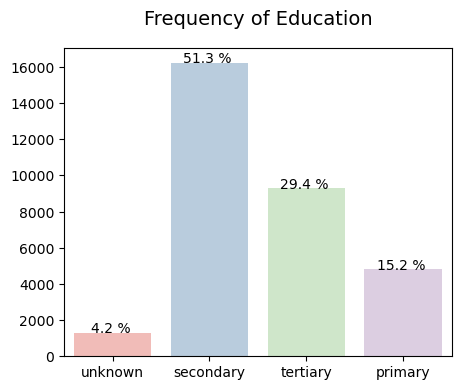

In [130]:
# Visualize the frequency of education
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='education', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Education", size=14, y=1.05)

df['education'].value_counts().to_frame()

,count
default,
no,31062
yes,585


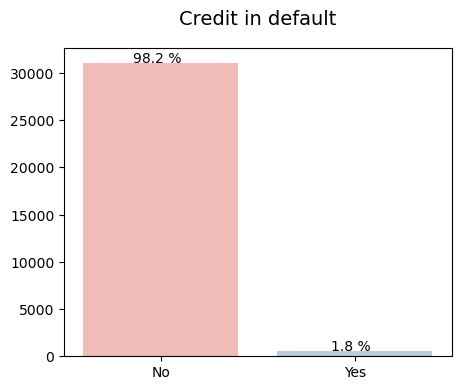

In [46]:
# Visualize the frequency of default
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='default', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['No', 'Yes'], size=10)
plt.title(f"Credit in default", size=14, y=1.05)

df['default'].value_counts().to_frame()

,count
housing,
yes,17584
no,14063


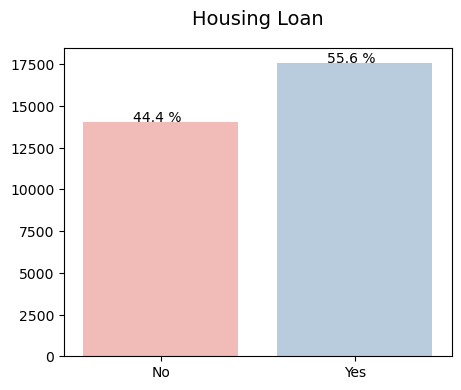

In [131]:
# Visualize the frequency of housing
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='housing', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['No', 'Yes'], size=10)
plt.title(f"Housing Loan", size=14, y=1.05)

df['housing'].value_counts().to_frame()

,count
loan,
no,26516
yes,5131


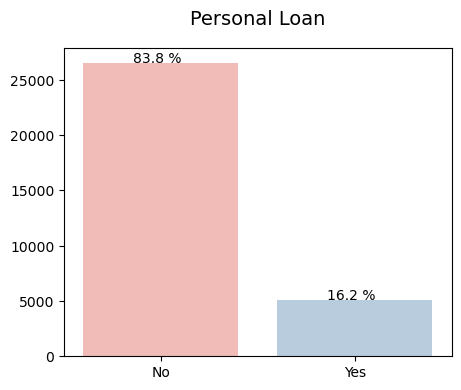

In [48]:
# Visualize the frequency of loan
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='loan', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['No', 'Yes'], size=10)
plt.title(f"Personal Loan", size=14, y=1.05)

df['loan'].value_counts().to_frame()

,count
contact,
cellular,20423
unknown,9177
telephone,2047


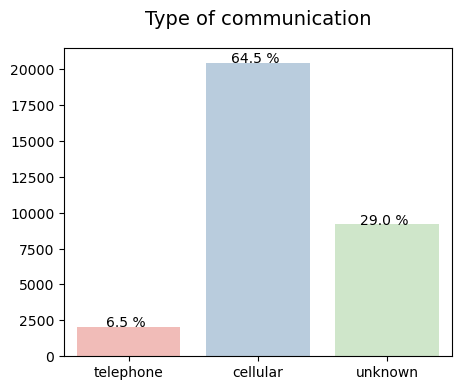

In [132]:
# Visualize the frequency of contact
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='contact', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Type of communication", size=14, y=1.05)

df['contact'].value_counts().to_frame()

,proportion
month,
may,0.305527
jul,0.153063
aug,0.136917
jun,0.118115
nov,0.087939
apr,0.064935
feb,0.057731
jan,0.030872
oct,0.016178


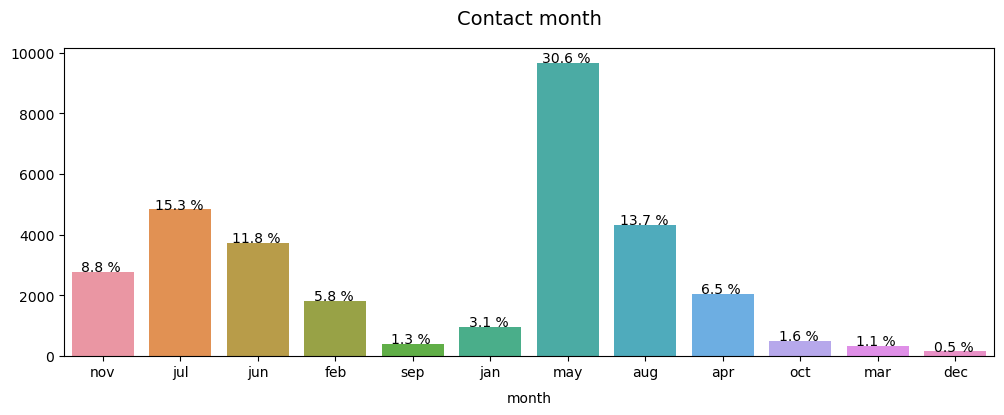

In [133]:
# Visualize the frequency of month
plt.figure(figsize=(12, 4))
ax = sns.countplot(x='month', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('month', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Contact month", size=14, y=1.05)

df['month'].value_counts(normalize=True).to_frame()

,count
poutcome,
unknown,25929
failure,3362
other,1288
success,1068


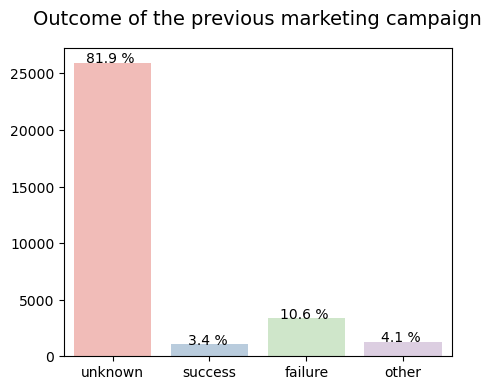

In [51]:
# Visualize the frequency of poutcome
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='poutcome', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Outcome of the previous marketing campaign", size=14, y=1.05)

df['poutcome'].value_counts().to_frame()

In [134]:
numerical_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

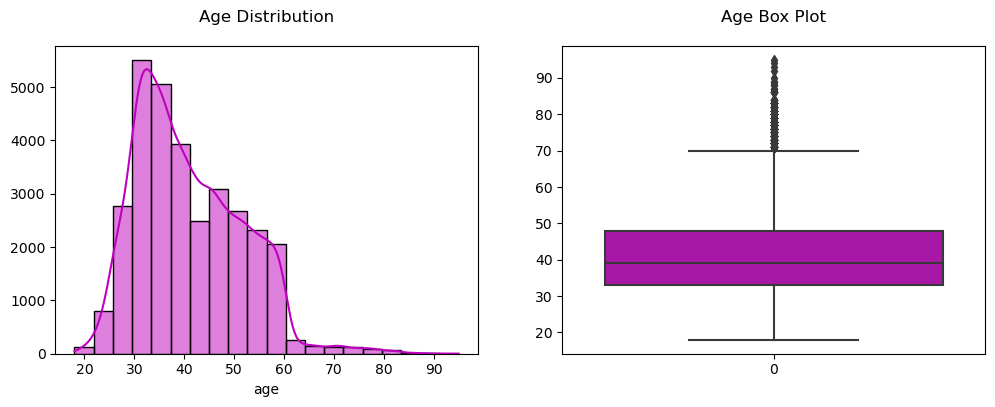

Skewness of Age : 0.6816067818884382


In [135]:
#Visualize age distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['age'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['age'], ax=axes[1], color='m')

axes[0].set_title('Age Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Age Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of age
print(f"Skewness of Age : {df.age.skew()}")

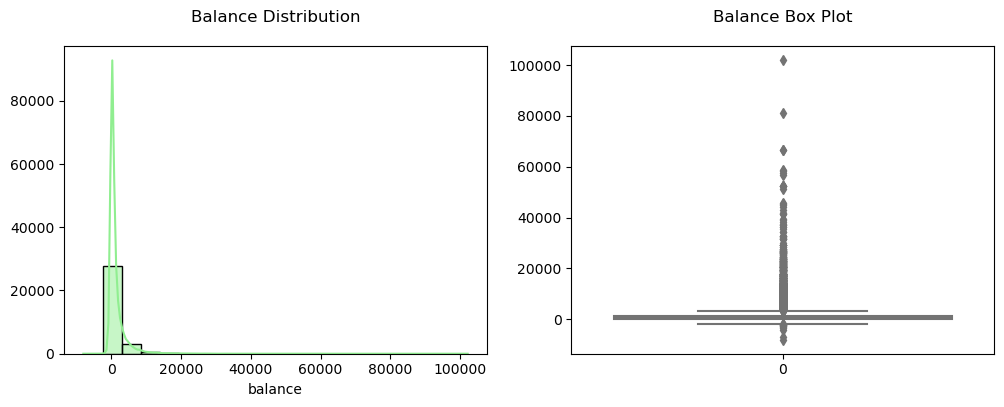

Skewness of balance : 7.995695573886313


In [136]:
#Visualize Balance distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['balance'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['balance'], ax=axes[1], color='lightgreen')

axes[0].set_title('Balance Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Balance Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of balance
print(f"Skewness of balance : {df.balance.skew()}")

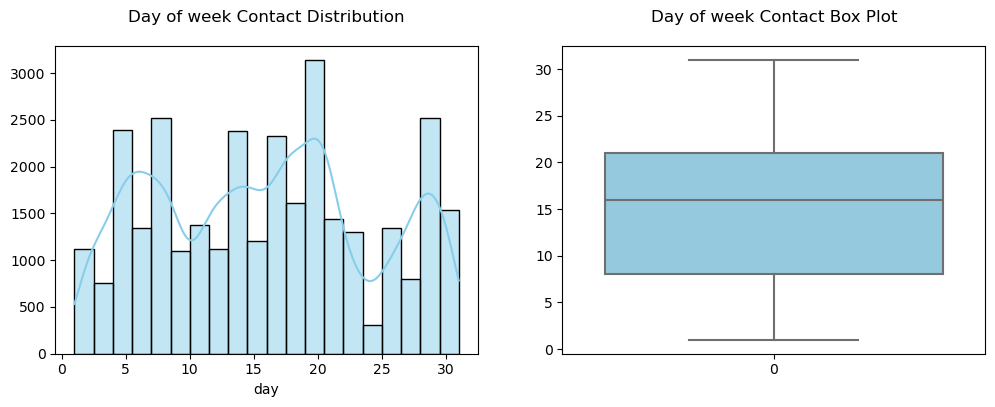

Skewness of day : 0.08718543483770899


In [137]:
#Visualize day distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['day'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['day'], ax=axes[1], color='skyblue')

axes[0].set_title('Day of week Contact Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Day of week Contact Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of day
print(f"Skewness of day : {df.day.skew()}")

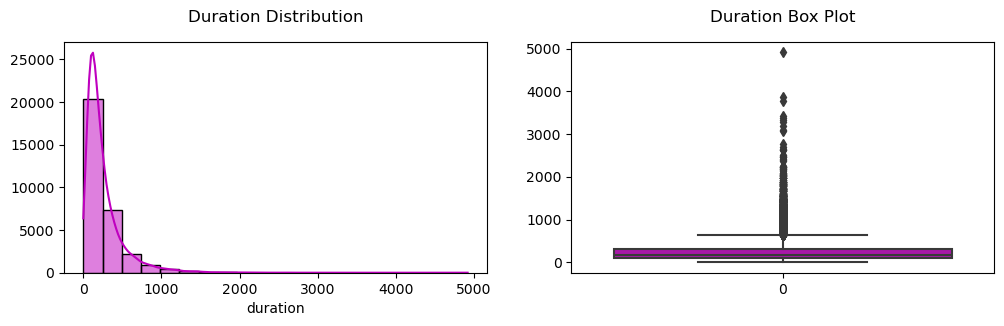

Skewness of duration : 3.1997657339236736


In [56]:
#Visualize duration distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df['duration'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['duration'], ax=axes[1], color='m')

axes[0].set_title('Duration Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Duration Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of duration
print(f"Skewness of duration : {df.duration.skew()}")

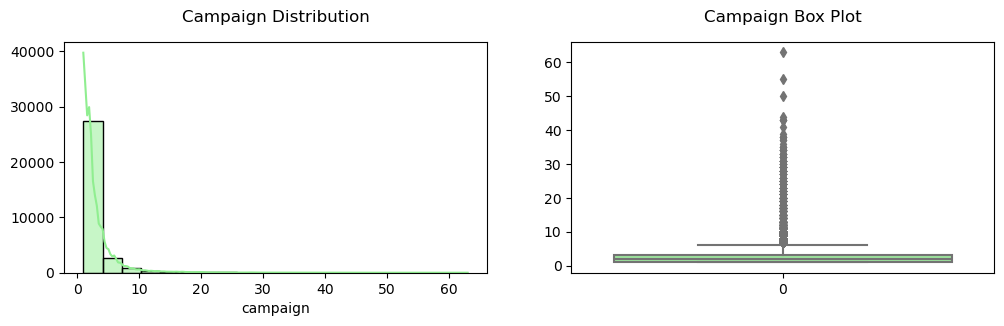

Skewness of campaign : 4.873934933081073


In [138]:
#Visualize Campaign distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df['campaign'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['campaign'], ax=axes[1], color='lightgreen')

axes[0].set_title('Campaign Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Campaign Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of campaign
print(f"Skewness of campaign : {df.campaign.skew()}")

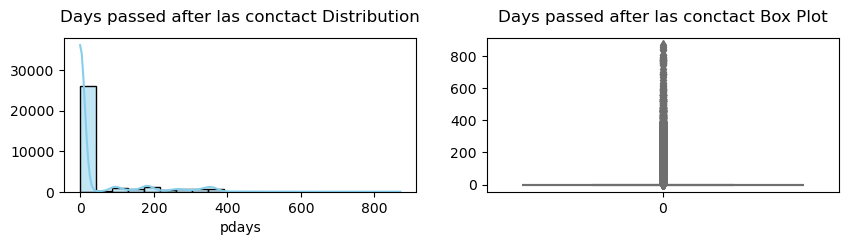

Skewness of Days passed after las conctact : 2.642374162969253


In [139]:
#Visualize Pdays distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 2))

sns.histplot(df['pdays'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['pdays'], ax=axes[1], color='skyblue')

axes[0].set_title('Days passed after las conctact Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Days passed after las conctact Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of pdays
print(f"Skewness of Days passed after las conctact : {df.pdays.skew()}")

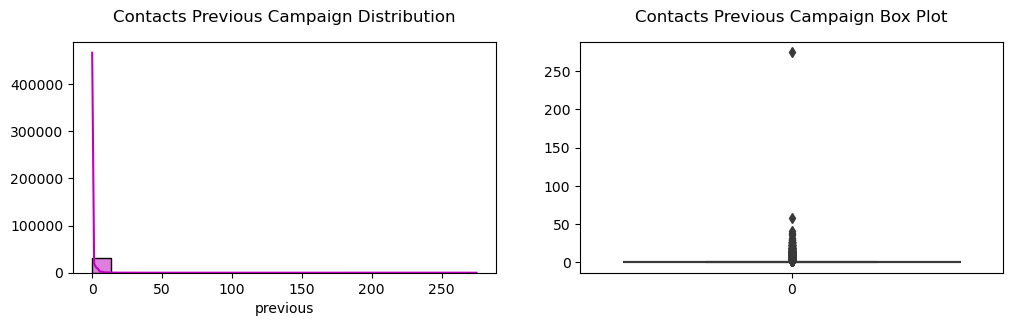

Skewness of previous : 49.30234792386907


In [140]:
#Visualize Previous distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df['previous'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['previous'], ax=axes[1], color='m')

axes[0].set_title('Contacts Previous Campaign Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Contacts Previous Campaign Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of previous
print(f"Skewness of previous : {df.previous.skew()}")

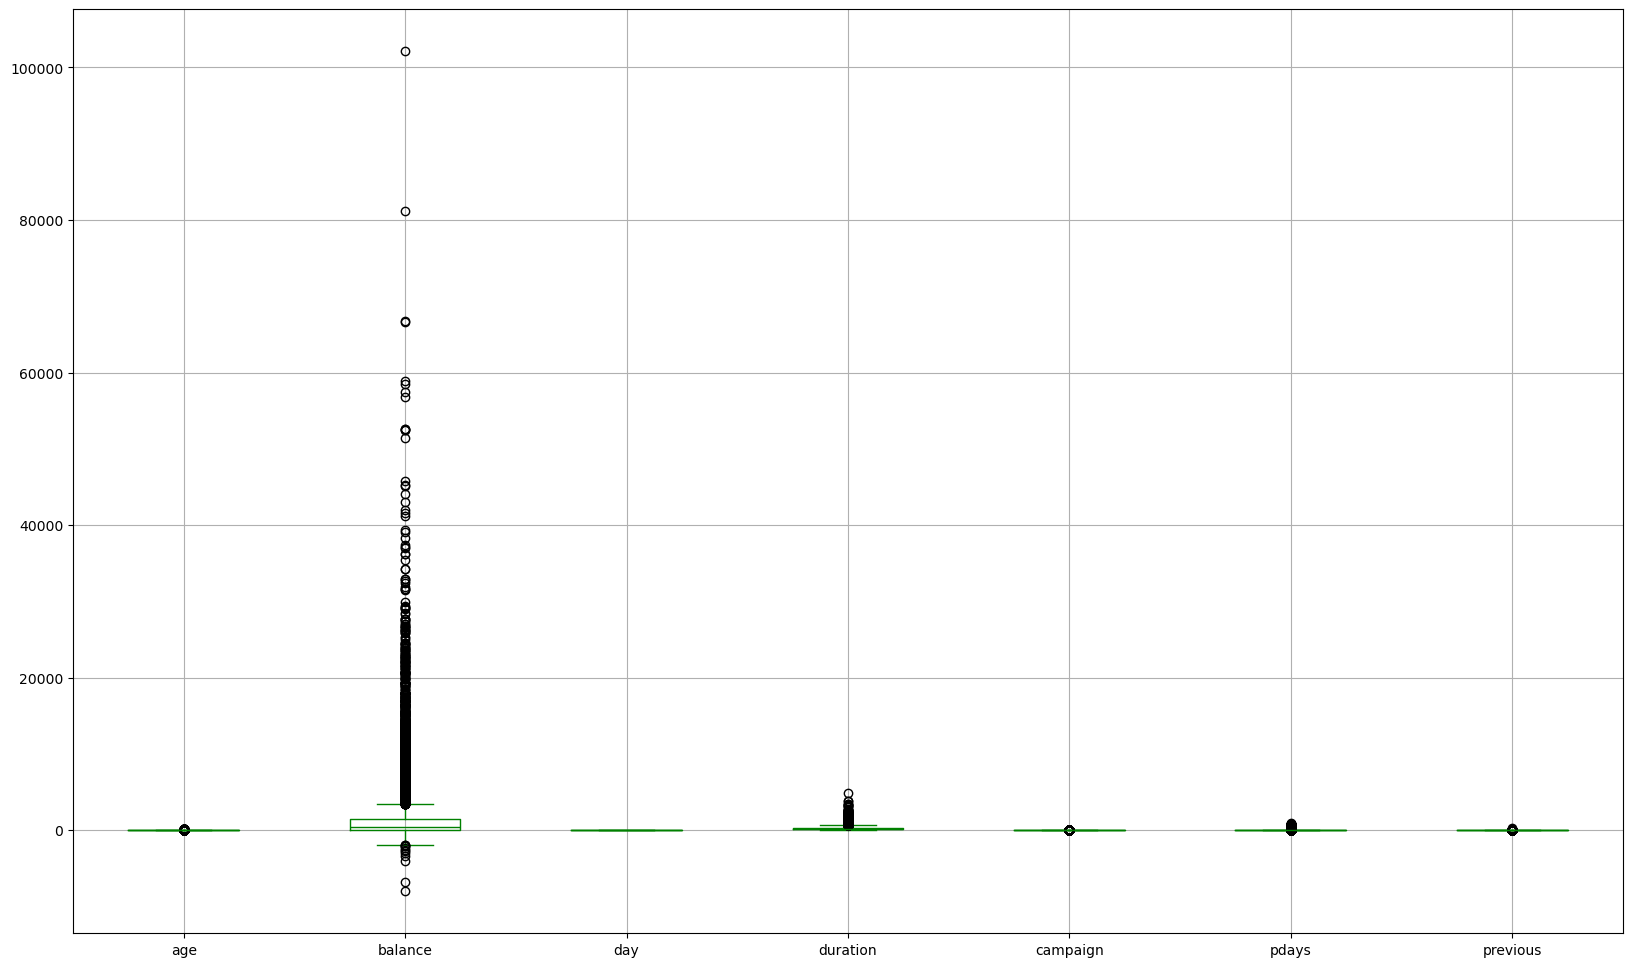

In [141]:
# Draw a boxplot for each independent variable 
df.boxplot(column=numerical_col, figsize=(20,12), color='green')
plt.show()

In [142]:
numerical_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

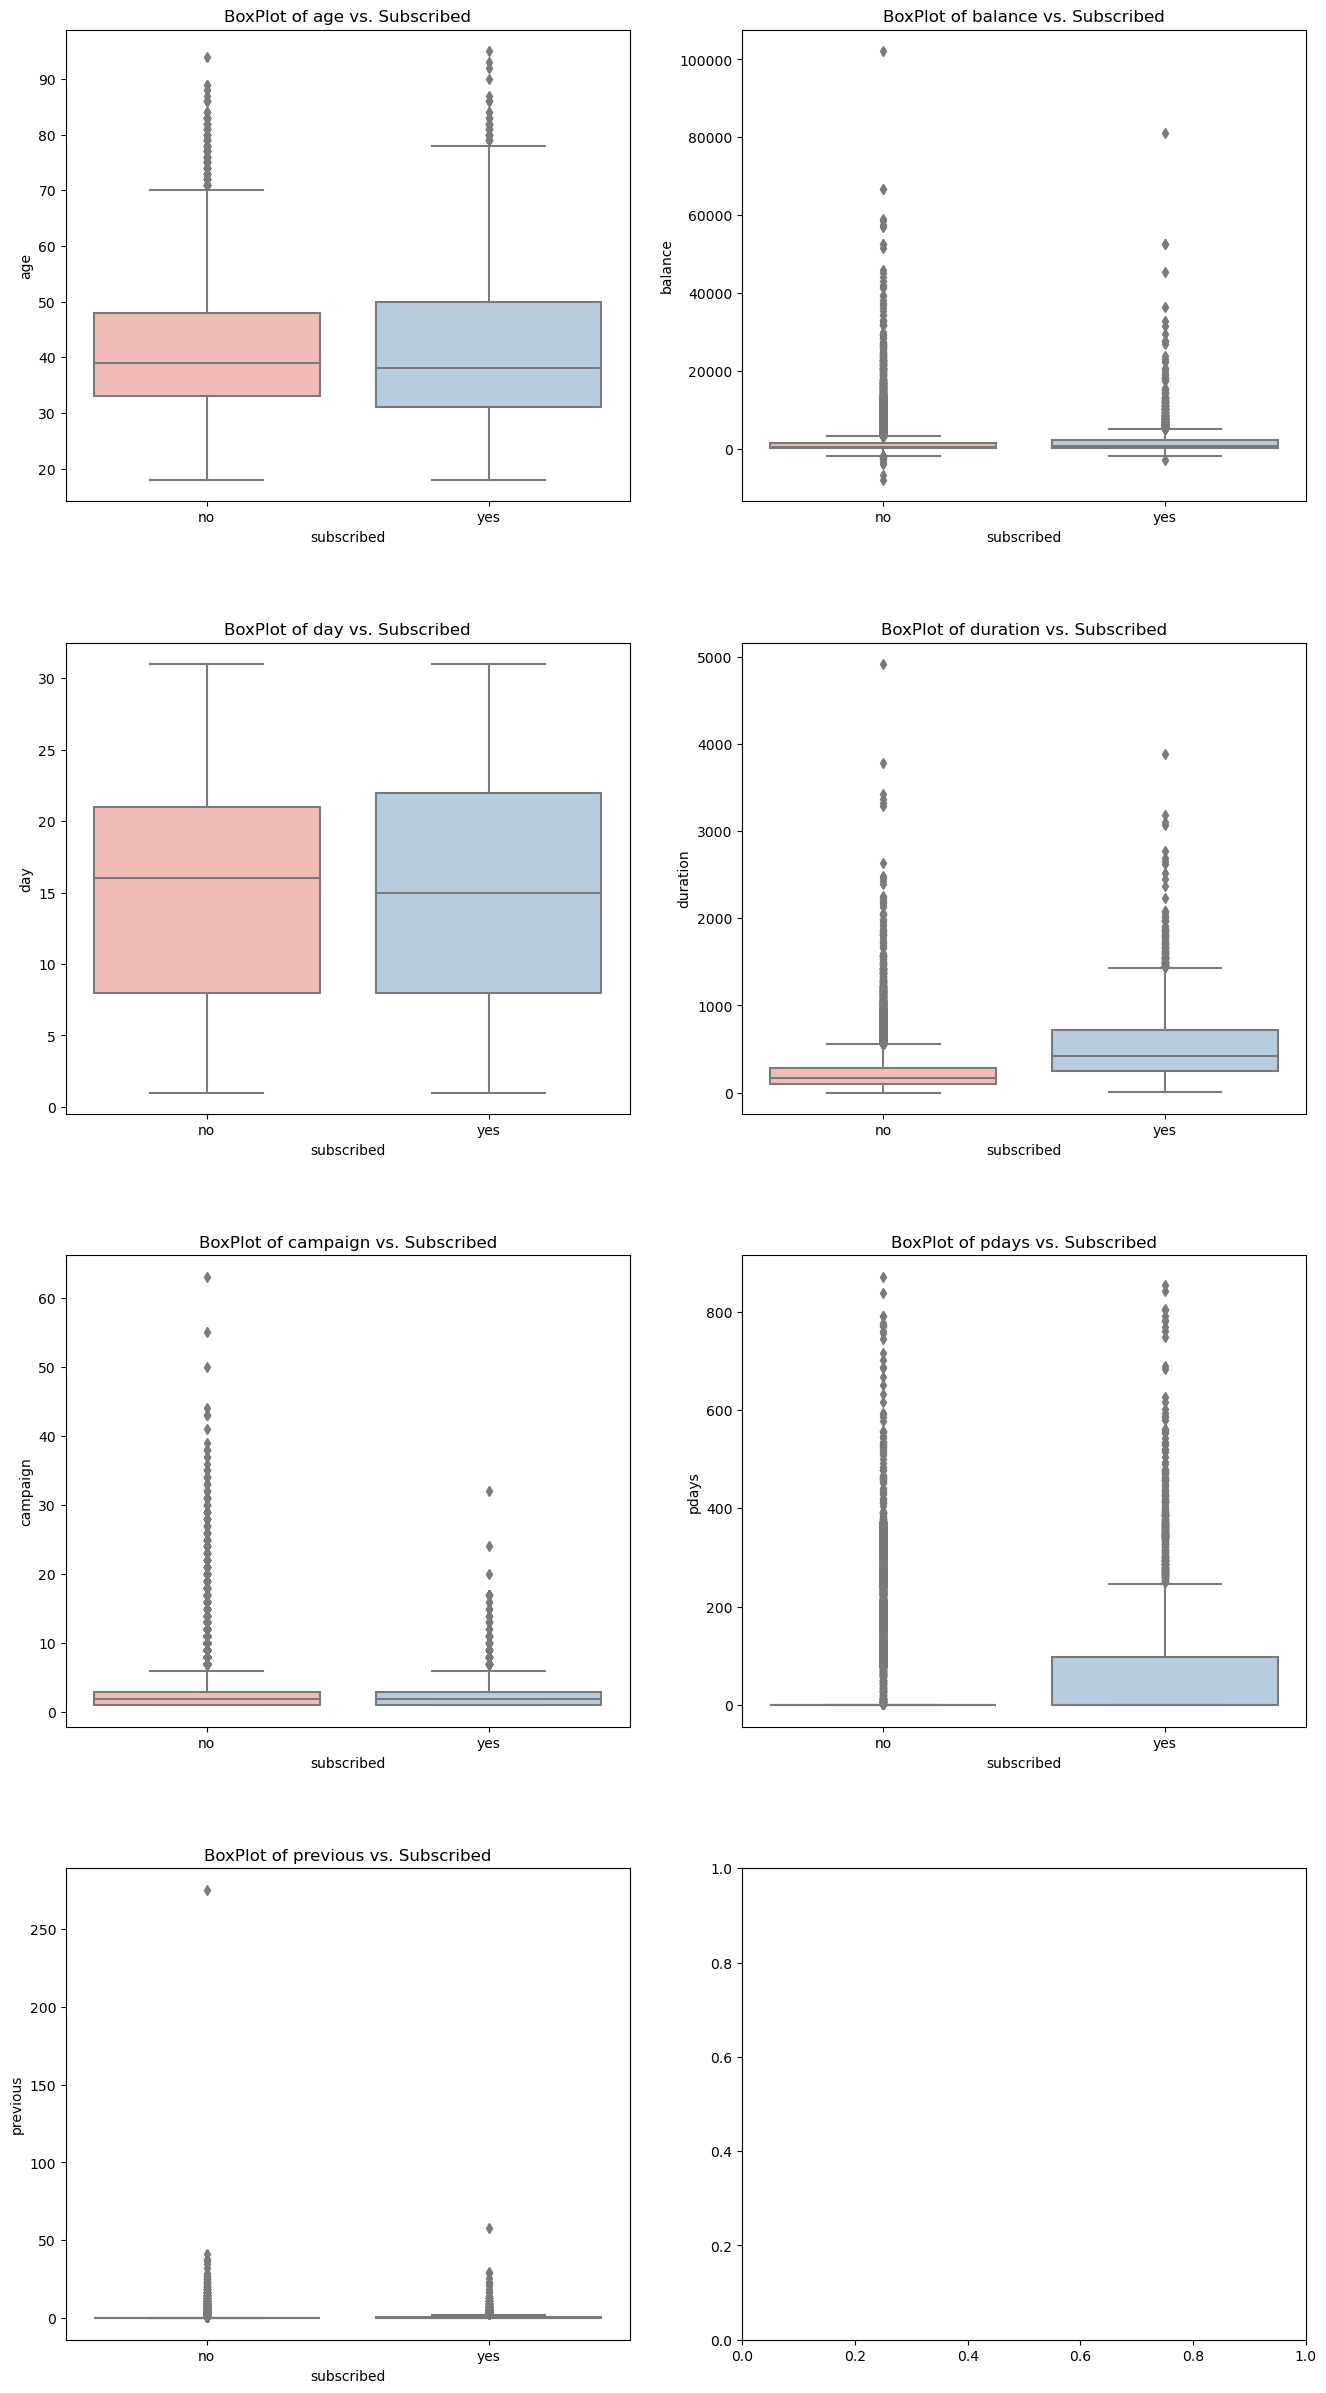

In [143]:
# Visualizing and comparing each independent variable with subscribed

fig, axs = plt.subplots(4, 2, figsize=(16, 30))
for ax, column in zip(axs.flat, numerical_col):
    sns.boxplot(data=df, y=column, x='subscribed', ax=ax)
    ax.set_title(f"BoxPlot of {column} vs. Subscribed")
    
plt.subplots_adjust(hspace=0.3)
plt.show()

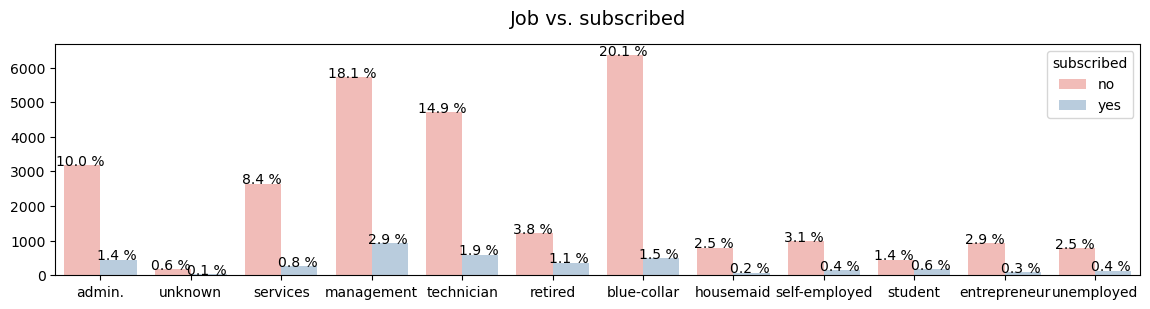

In [63]:
# Compare Job vs subscribe
plt.figure(figsize=(14, 3))
ax = sns.countplot(x='job', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Job vs. subscribed", size=14, y=1.05);

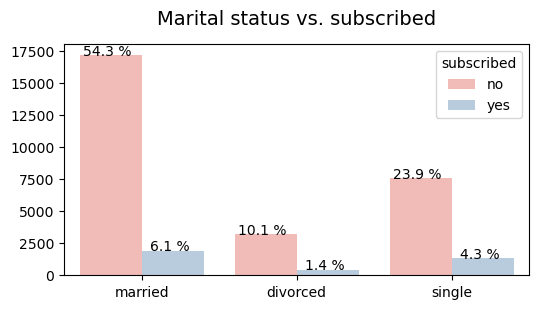

In [144]:
# Compare marital vs subscribe
plt.figure(figsize=(6, 3))
ax = sns.countplot(x='marital', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Marital status vs. subscribed", size=14, y=1.05);

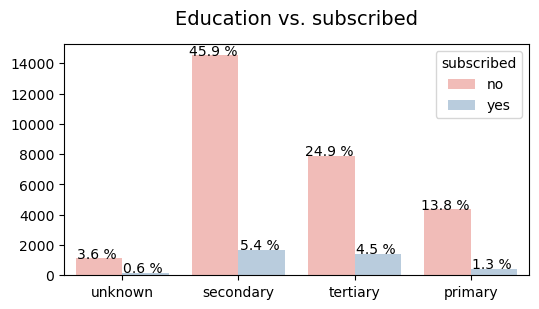

In [145]:
# Compare education vs subscribe
plt.figure(figsize=(6, 3))
ax = sns.countplot(x='education', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Education vs. subscribed", size=14, y=1.05);

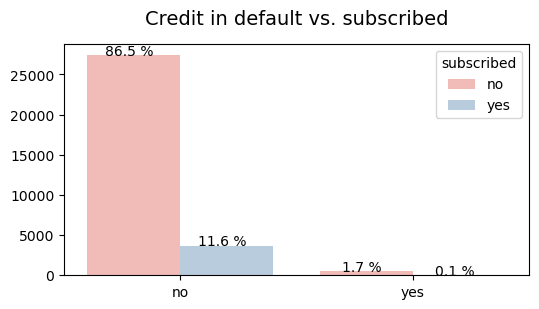

In [146]:
# Compare default vs subscribe
plt.figure(figsize=(6, 3))
ax = sns.countplot(x='default', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Credit in default vs. subscribed", size=14, y=1.05);

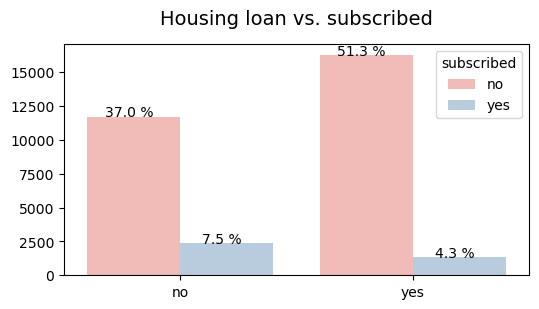

In [147]:
# Compare housing vs subscribe
plt.figure(figsize=(6, 3))
ax = sns.countplot(x='housing', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Housing loan vs. subscribed", size=14, y=1.05);

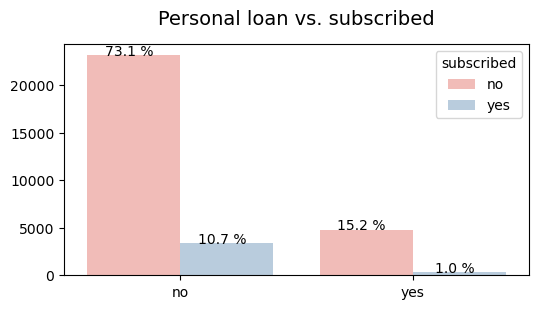

In [148]:
# Compare loan vs subscribe
plt.figure(figsize=(6, 3))
ax = sns.countplot(x='loan', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Personal loan vs. subscribed", size=14, y=1.05);

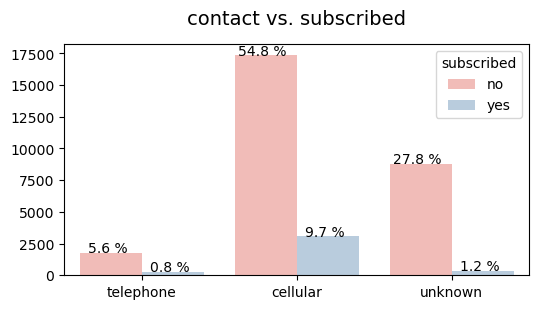

In [149]:
# Compare contact vs subscribe
plt.figure(figsize=(6, 3))
ax = sns.countplot(x='contact', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"contact vs. subscribed", size=14, y=1.05);

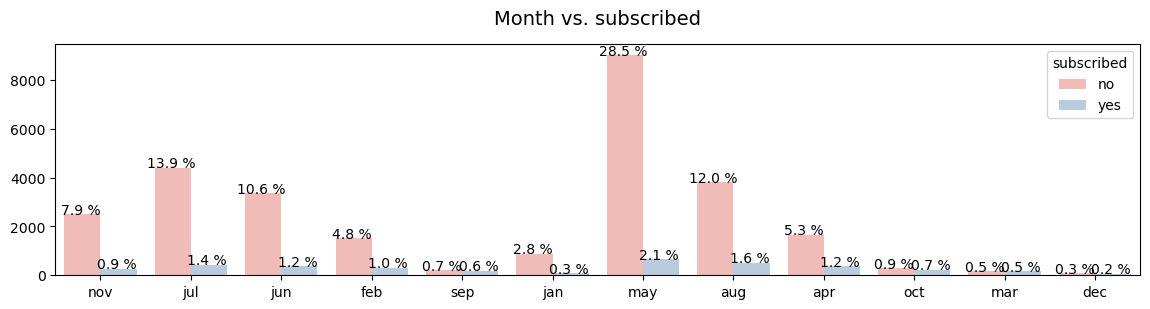

In [150]:
# Compare month vs subscribe
plt.figure(figsize=(14, 3))
ax = sns.countplot(x='month', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Month vs. subscribed", size=14, y=1.05);

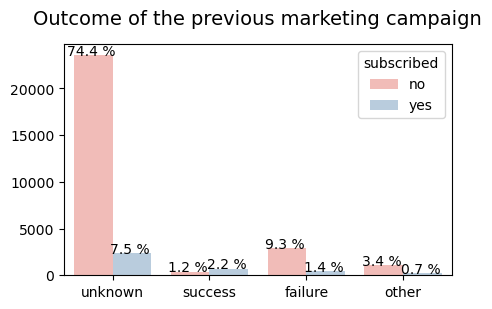

In [151]:
# Compare outcome vs subscribe
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='poutcome', hue='subscribed', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Outcome of the previous marketing campaign", size=14, y=1.05);

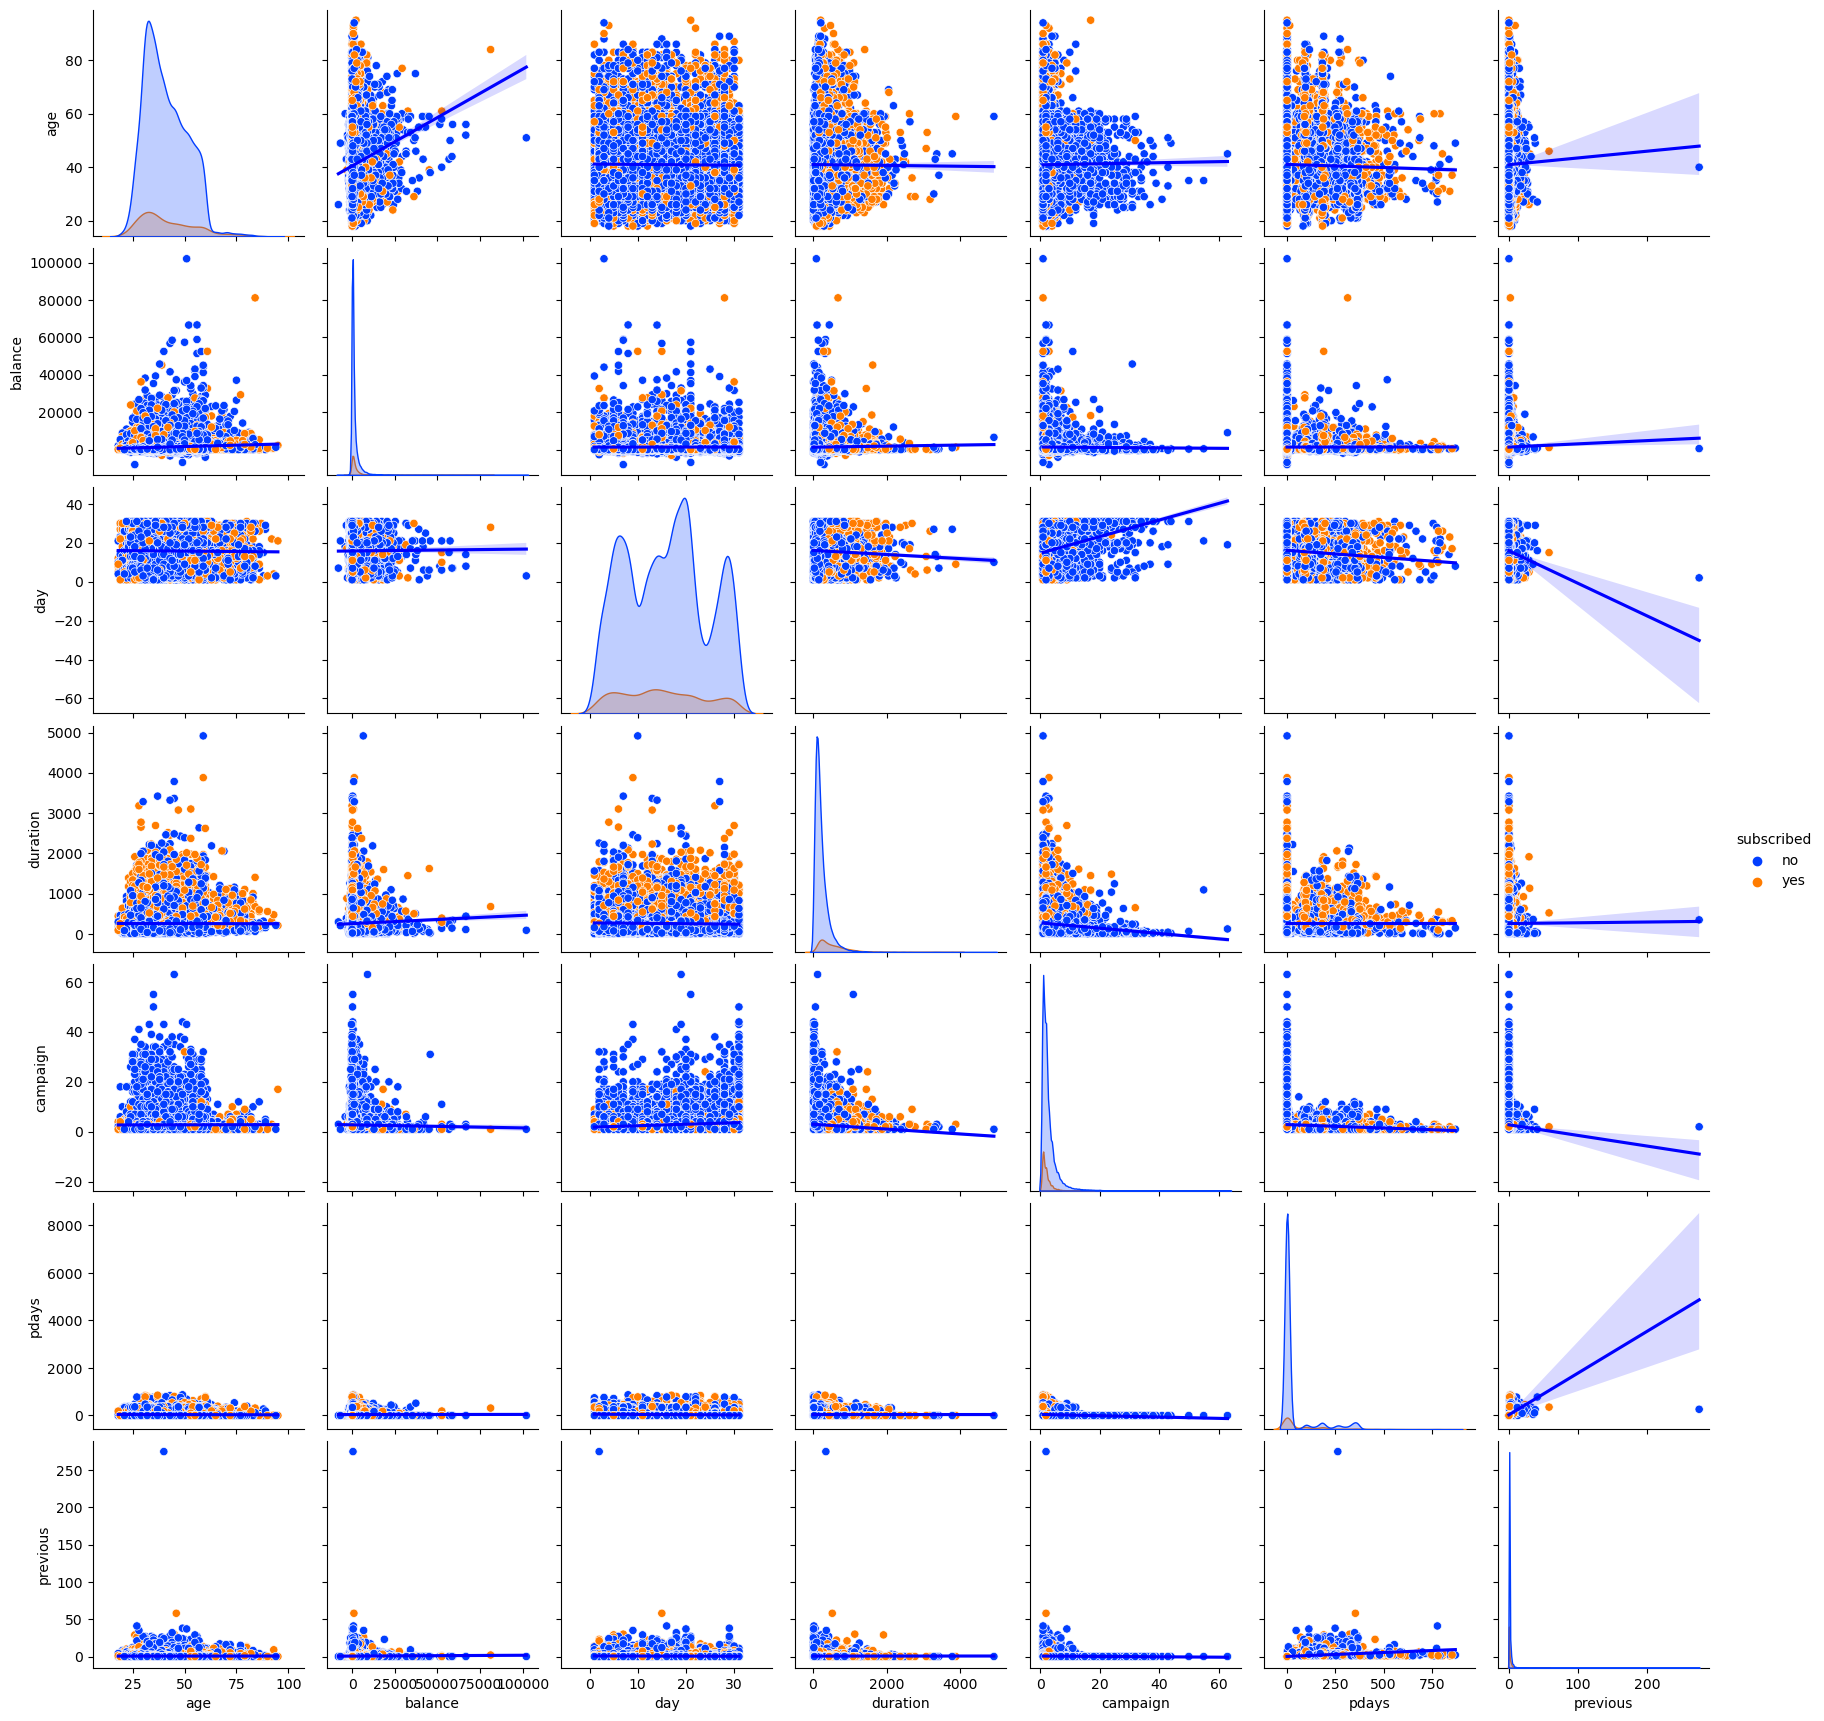

In [152]:
grid = sns.pairplot(df, hue = "subscribed", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

In [153]:
df.subscribed.unique()

array(['no', 'yes'], dtype=object)

In [154]:
df['subscribed'] = df['subscribed'].map({'yes': 1, 'no': 0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [155]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation between features
cor = numeric_df.corr()

# Display the correlation matrix
cor

,age,balance,day,duration,campaign,pdays,previous,subscribed
age,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


In [156]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'subscribed') ]

,Feature A,Feature B,Corr coef
7,subscribed,subscribed,1.000000
11,subscribed,duration,0.389838
14,subscribed,pdays,0.108290
18,subscribed,previous,0.088081
20,subscribed,balance,0.050807
22,subscribed,age,0.024538
49,subscribed,day,-0.029600
57,subscribed,campaign,-0.070607


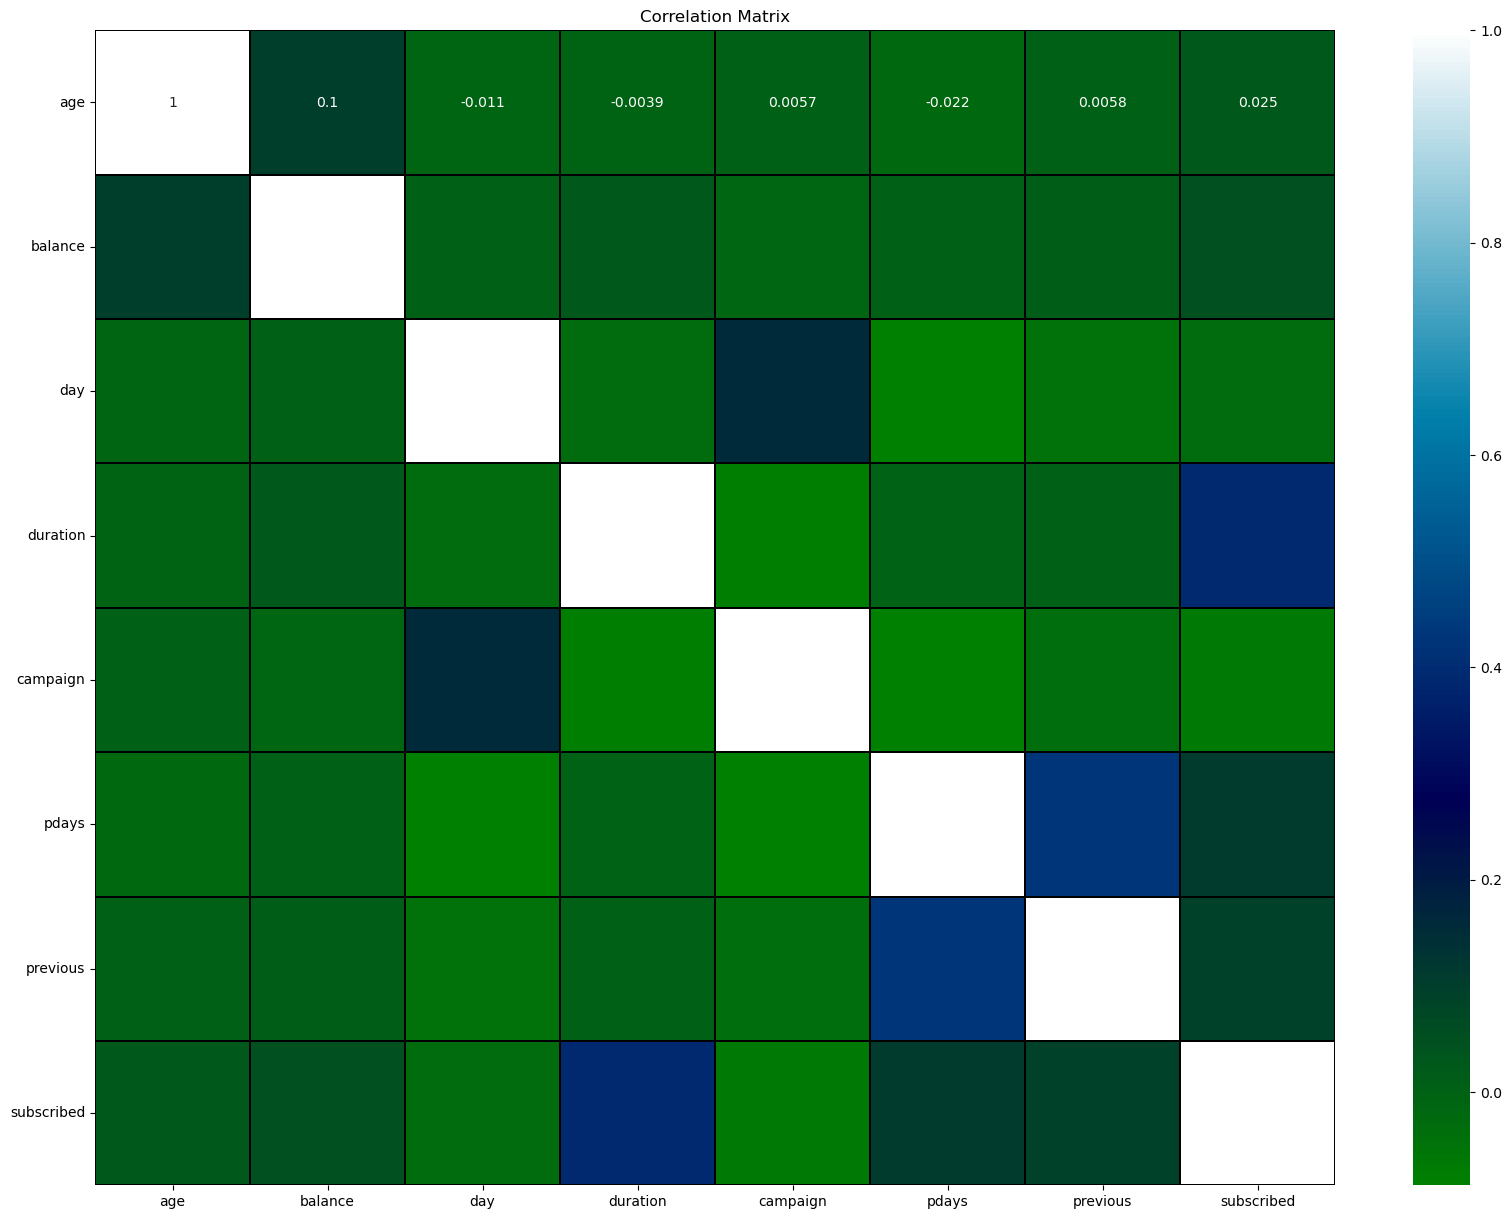

In [157]:
# Visualizing the correlation matrix by plotting heatmap
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation between features
cor = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths=0.1, fmt=".2g", linecolor='black', cmap='ocean', annot=True)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [158]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [159]:
# Encoding the yes/no features for train and test dataset.
for col in ['default', 'housing', 'loan']:
    df[col] = df[col].map({'yes': 1, 'no': 0})
    df_test[col] = df_test[col].map({'yes': 1, 'no': 0})

print(f"\n\n{'*'*30} dataset {'*'*30}")
display(df.head())

print(f"\n\n{'*'*30} Test dataset {'*'*30}")
display(df_test.head())



****************************** dataset ******************************


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0




****************************** Test dataset ******************************


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,0,118,1,0,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,0,2787,0,0,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,0,144,1,0,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,0,3777,1,0,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,0,-705,0,1,unknown,3,jul,111,1,-1,0,unknown


In [160]:
# Encoding the other features using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in ['job', 'marital', 'education', 'contact', 'month', 'poutcome']:
    df[i] = OE.fit_transform(df[i].values.reshape(-1, 1))
    df_test[i] = OE.fit_transform(df_test[i].values.reshape(-1, 1))
    
print(f"\n\n{'*'*30} dataset {'*'*30}")
display(df.head())

print(f"\n\n{'*'*30} Test dataset {'*'*30}")
display(df_test.head())



****************************** dataset ******************************


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0,0




****************************** Test dataset ******************************


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7.0,1.0,1.0,0,118,1,0,0.0,15,8.0,20,6,-1,0,3.0
1,78,5.0,0.0,0.0,0,2787,0,0,1.0,1,5.0,372,1,-1,0,3.0
2,31,6.0,2.0,2.0,0,144,1,0,2.0,16,8.0,676,1,-1,0,3.0
3,57,7.0,2.0,0.0,0,3777,1,0,1.0,13,8.0,65,2,-1,0,3.0
4,45,1.0,0.0,1.0,0,-705,0,1,2.0,3,5.0,111,1,-1,0,3.0


In [161]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,1.415793,1.324317,0.275405,2.369229,0.137234,0.187933,1.118201,0.439893,0.395076,0.379579,1.154007,0.832754,0.245906,0.408555,0.237059,0.441777,0.364694
1,0.937156,2.037729,0.275405,0.300345,0.137234,0.449397,1.118201,0.439893,0.716695,0.499526,0.177462,0.649957,0.245906,0.408555,0.237059,0.441777,0.364694
2,1.313627,0.815167,0.275405,0.300345,0.137234,0.156159,0.894294,0.439893,0.716695,0.259631,0.177462,0.070449,0.567059,0.408555,0.237059,0.441777,0.364694
3,1.509911,0.101755,1.922374,1.034442,0.137234,0.635055,1.118201,0.439893,0.716695,0.739422,0.155405,2.368149,0.567059,0.447299,1.001336,0.576498,2.742026
4,0.937156,1.426448,0.275405,0.300345,0.137234,0.411091,0.894294,0.439893,0.716695,1.419637,0.843197,0.474054,0.567059,0.408555,0.237059,0.441777,0.364694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.125392,0.101755,1.371563,1.034442,0.137234,0.450388,0.894294,0.439893,0.716695,0.460055,0.821140,0.552724,0.245906,0.408555,0.237059,0.441777,0.364694
31643,1.133439,0.101755,1.922374,1.034442,0.137234,0.324903,1.118201,2.273280,0.716695,1.299690,0.155405,0.699635,0.245906,0.408555,0.237059,0.441777,2.742026
31644,0.843038,0.101755,1.371563,1.034442,0.137234,0.347358,1.118201,0.439893,0.716695,1.059794,1.508931,0.859979,0.075247,0.408555,0.237059,0.441777,0.364694
31645,1.509911,1.426448,0.275405,0.300345,0.137234,0.376088,0.894294,0.439893,0.395076,0.100212,0.821140,0.918319,1.359859,2.994723,4.716521,2.613048,0.364694


In [162]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df_process = df_new.copy()
df_process

4063 rows with outliers were deleted.
This represent 12.84% of the data.
In the new dataset there are 27584 rows and 17 columns.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0,1933,0,0,1.0,19,9.0,44,2,-1,0,3.0,0
1,31,11.0,1.0,1.0,0,3,0,0,0.0,20,5.0,91,2,-1,0,3.0,0
2,27,7.0,1.0,1.0,0,891,1,0,0.0,18,5.0,240,1,-1,0,3.0,0
3,57,4.0,0.0,2.0,0,3287,0,0,0.0,22,6.0,867,1,84,3,2.0,1
4,31,9.0,1.0,1.0,0,119,1,0,0.0,4,3.0,380,1,-1,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,4.0,2.0,1.0,0,2968,0,0,2.0,20,6.0,30,4,-1,0,3.0,0
31641,37,9.0,2.0,2.0,0,1309,0,0,2.0,6,6.0,442,2,-1,0,3.0,0
31642,29,4.0,2.0,2.0,0,0,1,0,0.0,12,8.0,116,2,-1,0,3.0,0
31643,53,4.0,0.0,2.0,0,380,0,1,0.0,5,6.0,438,2,-1,0,3.0,1


In [163]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
previous,3.657231
pdays,2.799415
subscribed,2.624756
balance,2.433928
campaign,2.064222
loan,1.829242
duration,1.596175
contact,0.698882
age,0.439159
job,0.258302


In [164]:
# Subsetting the features with a skew > 0.5
df_skew[(df_skew['Skew'] > 0.5) | (df_skew['Skew'] < -0.5)]

,Skew
previous,3.657231
pdays,2.799415
subscribed,2.624756
balance,2.433928
campaign,2.064222
loan,1.829242
duration,1.596175
contact,0.698882
poutcome,-2.449518


Considering the skewness of the continuous numerical columns:

previous (3.657231)
pdays (2.799415)
balance (2.433928)
campaign (2.064222)
duration (1.596175)
is greater than 0.5 or lower than -0.5, we are going to apply methods to remove it. The variables subscribed, loan, contact, and poutcome are not considered since they are categorical.

In [165]:
# Checking skewness using cuberoot method and log method
skew_columns = ['previous', 'pdays', 'balance', 'campaign', 'duration']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_process[col])
    df_transformed[f"{col}_log"] = np.log(df_process[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df_process[col])
        
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_process[skew_columns]], axis=1)

In [167]:
# Comparing which transform method give better results
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

,Skewness
previous_sqrt,2.535886
previous_log,NaN
previous_cbrt,2.275265
previous,3.657231
pdays_sqrt,-0.692272
pdays_log,-2.999089
pdays_cbrt,2.162491
pdays,2.799415
duration_sqrt,0.675282
duration_log,NaN


In [168]:
# Transform data  
for col in ['previous', 'balance', 'duration']:
    df_process[col] = np.cbrt(df_process[col])
    df_test[col] = np.cbrt(df_test[col])

# Square root transformation
df_process['pdays'] = np.sqrt(df_process['pdays'])
df_test['pdays'] = np.sqrt(df_test['pdays'])

# Log transformation
df_process['campaign'] = np.log(df_process['campaign'])
df_test['campaign'] = np.log(df_test['campaign'])

df_process.skew().sort_values(ascending=False).to_frame("Skewness after transform")

,Skewness after transform
subscribed,2.624756
previous,2.080341
loan,1.829242
contact,0.698882
age,0.439159
job,0.258302
education,0.197092
day,0.075854
default,0.000000
marital,-0.095968


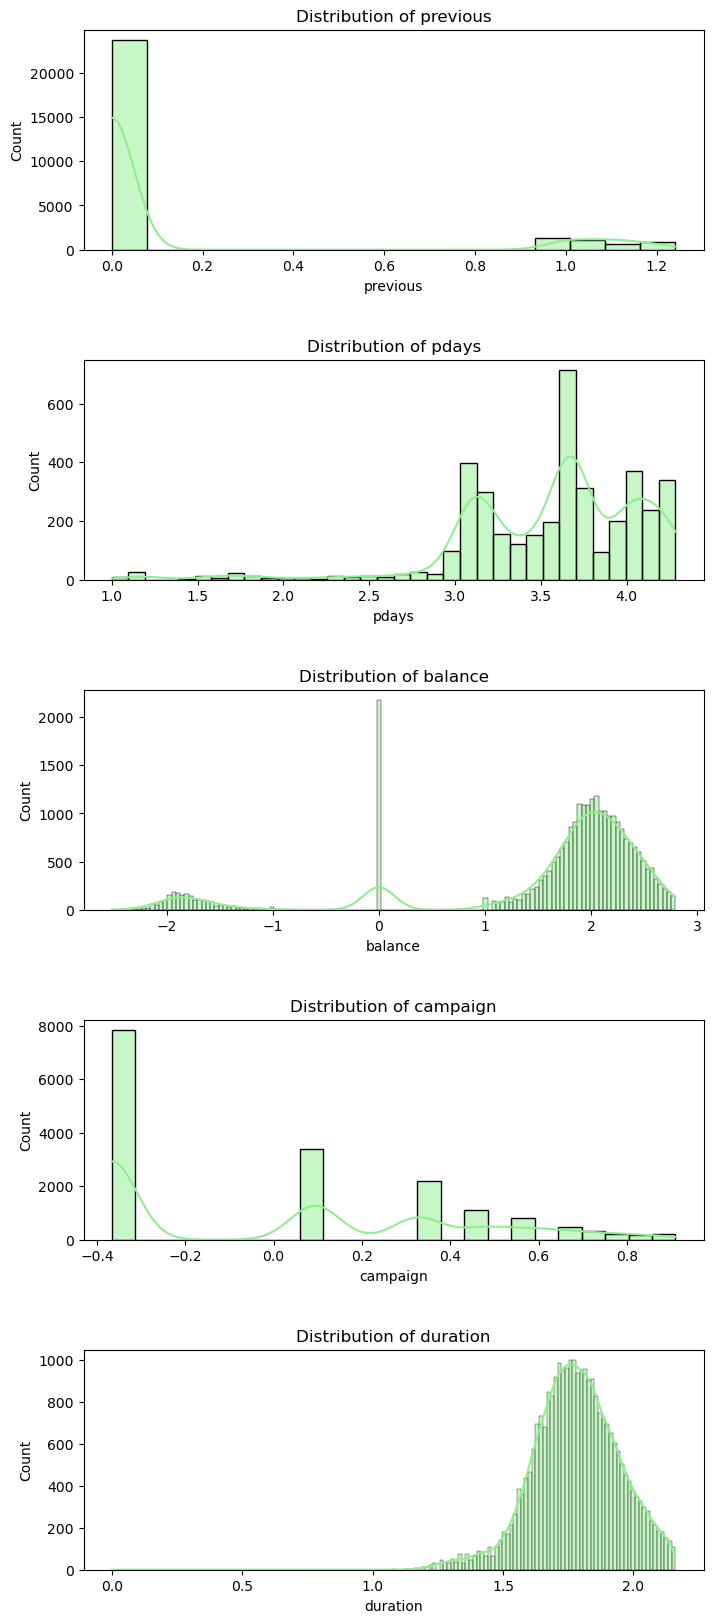

In [169]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(5, 1, figsize=(8, 20)) 
for ax, column in zip(axs.flat, skew_columns):
    sns.histplot(data=df_process, x=column, ax=ax, kde=True, color='lightgreen')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [170]:
# Separating the independent and target variables into x and y 
x = df_process.drop('subscribed', axis=1)
y = df_process['subscribed']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (27584, 16)
Label Dimension = (27584,)


In [172]:
from sklearn.preprocessing import StandardScaler
# Sample data creation for demonstration (You can use your own data instead)
# df = pd.read_csv('your_data.csv') # Uncomment and use this line to read your data

# Replace inf values with NaN
x.replace([np.inf, -np.inf], np.nan, inplace=True)

# Handle NaN values: Example of filling NaNs with the column mean (you can use other strategies)
x.fillna(x.mean(), inplace=True)

# Verify no inf or NaN values remain
if not np.isfinite(x.values).all():
    raise ValueError("Data still contains NaN or inf values after preprocessing.")

# Initialize scaler
scaler = StandardScaler()

# Scale training data
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# If you have a separate test dataset, handle it similarly
# df_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# df_test.fillna(df_test.mean(), inplace=True)
# df_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

print(x_scaled)
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(x.mean(), inplace=True)
if not np.isfinite(x.values).all():
    raise ValueError("Data still contains NaN or inf values after preprocessing.")
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


            age       job   marital  education  default   balance   housing  \
0      1.519669 -1.322283 -0.279034   2.374747      0.0  0.630170 -1.109257   
1     -0.957582  2.021767 -0.279034  -0.302260      0.0 -0.394900 -1.109257   
2     -1.353942  0.805749 -0.279034  -0.302260      0.0  0.465284  0.901504   
3      1.618759 -0.106265 -1.932500   1.036243      0.0  0.751679 -1.109257   
4     -0.957582  1.413758 -0.279034  -0.302260      0.0  0.097516  0.901504   
...         ...       ...       ...        ...      ...       ...       ...   
27579  0.231499 -0.106265  1.374431  -0.302260      0.0  0.727754 -1.109257   
27580 -0.363042  1.413758  1.374431   1.036243      0.0  0.545407 -1.109257   
27581 -1.155762 -0.106265  1.374431   1.036243      0.0 -1.369537  0.901504   
27582  1.222399 -0.106265 -1.932500   1.036243      0.0  0.299523 -1.109257   
27583 -0.858492 -0.106265  1.374431   1.036243      0.0  0.263356 -1.109257   

           loan   contact       day     month  dura

In [173]:
missing_values = x.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [174]:
# Dropping pdays from training and testing dataset
x.drop(['pdays'], axis=1, inplace=True)
df_test.drop(['pdays'], axis=1, inplace=True)

In [175]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
11,duration,67.162375
14,poutcome,54.466049
0,age,18.656595
13,previous,6.655853
2,marital,5.494934
10,month,5.453652
9,day,4.550839
3,education,3.900503
5,balance,2.966734
1,job,2.866095


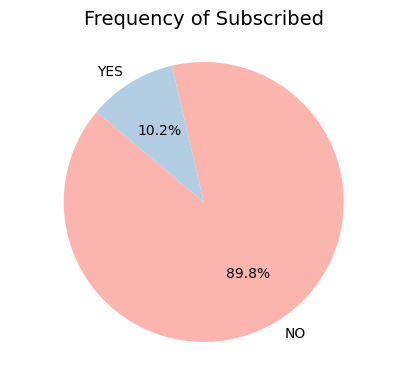

In [176]:
# Count the frequencies of target
target_counts = y.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['NO', 'YES'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Subscribed", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [177]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

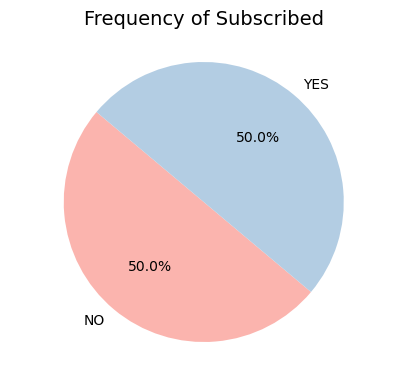

In [178]:
# Count the frequencies of target
target_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['NO', 'YES'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Subscribed", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [179]:
X = x1
Y = y1

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


In [ ]:
# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [ ]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}
    

In [ ]:
%%time
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

In [ ]:
%%time
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

In [ ]:
%%time

id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

In [ ]:
%%time

id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

In [ ]:
%%time

id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

In [ ]:
%%time

id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

In [ ]:
%%time

id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred

In [ ]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

In [ ]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='Pastel1')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

In [ ]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [ ]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [ ]:
%%time
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff
    

In [ ]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

In [ ]:
random_state

In [ ]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 50, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model 
model = ExtraTreesClassifier()

In [ ]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

In [ ]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
best_params

In [ ]:
best_model

In [ ]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'gini', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 24)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

In [ ]:
models

In [ ]:
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

# First Plot ROC Curve from Best Model
plot_roc_curve(best_model, x_test, y_test, ax=ax)

# Plot each ROC Curve from each model 
for id_model, model in models.items(): 
    plot_roc_curve(model, x_test, y_test, ax=ax)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [ ]:
# Let's check the AUC for the best model after hyer parameter tuning
plot_roc_curve(best_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show() 

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/Bank_marketing_model.pkl")

In [ ]:
# Lets load the saved model and get the predictions
model = joblib.load("models/Bank_marketing_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

In [ ]:
# Prediction on the testing data provided
prediction = model.predict(df_test)

df_final = df_test.copy()
df_final['subscribed'] = prediction

df_final.to_csv("bank_test_predicted_final.csv")
df_final

In [ ]:
df_final.subscribed.value_counts()

In [ ]:
# Count the frequencies of target
target_counts = df_final.subscribed.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(target_counts, labels=['NO', 'YES'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Subscribed", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Final Conclusions:

The given dataset consists of 17 features, however, we are doing uni-variate analysis only on 16 features because the "ID" does not give much information for prediction.
The best model was ExtraTreesClassifier with accuracy_score: 96.7021%
Eliminating the outliers represented the elimination of 12.84% of the total records (4063 rows).
After scaling the data we had to drop pdays column since it presented missing values.